In [1]:
import pandas as pd

# TIME SERIES

In this section, we'll cover `time series` in Pandas, which leverages the datetime data type to extract date components, group by dates, and perform calculations like moving averages. 

<img src="../images/sec07-time_series/0-topics_and_goals.png">

## 1 - The Datetime Data Type

### Times in Python and Pandas

Base Python's `datetime` data type lets you work with time series data
* Datetimes include both a date and time portion by default

In [2]:
from datetime import datetime

now = datetime.now()

now 

datetime.datetime(2023, 7, 3, 8, 54, 47, 637883)

In [3]:
type(now)

datetime.datetime

NumPy's `datetime64` data type lets you work with datetimes in DataFrames
* Pandas will treat date as "object" datatypes until converted to "datetime64"


```python
sales = sales.astype({"date": "datetime64", "sales": "Int16"})

```

### Converting To Datetimes

### **TO DATETIME**

The `.to_datetime()` method is a more flexible option for converting datetimes

<img src="../images/sec07-time_series/1-to_datetime.png">

In [4]:
retail = pd.read_csv("../retail/retail_2016_2017.csv")

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [5]:
# when we first try to read in dates, they're going to be read in as an object data type
# our dataframe is taking up about 168 MB (megabytes) of memory

retail.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1054944 non-null  int64  
 1   date         1054944 non-null  object 
 2   store_nbr    1054944 non-null  int64  
 3   family       1054944 non-null  object 
 4   sales        1054944 non-null  float64
 5   onpromotion  1054944 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 167.8 MB


In [6]:
retail = retail.astype({"date": "datetime64[ns]"})

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [7]:
# the date column is now (has successfully stored as) a datetime data type

retail.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [8]:
retail = pd.read_csv("../retail/retail_2016_2017.csv")

In [9]:
retail.loc[0, ["date"]] = 'N/A'

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,N/A,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [ ]:
retail.astype({"date": "datetime64[ns]"})

# DateParseError: 
# Unknown datetime string format, unable to parse: N/A, at position 0: Error while type casting for column 'date'

In [ ]:
retail.assign(date=pd.to_datetime(retail["date"], 
                                        infer_datetime_format=True))

# DateParseError: Unknown datetime string format, unable to parse: N/A, at position 0

In [12]:
retail.assign(date=pd.to_datetime(retail["date"], 
                                        errors="coerce", # coerce invalid values to NaT
                                        infer_datetime_format=True))

/var/folders/bq/ykg85zb53szcclzhm6rr_hch0000gn/T/ipykernel_93415/1601595329.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  retail.assign(date=pd.to_datetime(retail["date"],
/var/folders/bq/ykg85zb53szcclzhm6rr_hch0000gn/T/ipykernel_93415/1601595329.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail.assign(date=pd.to_datetime(retail["date"],


,id,date,store_nbr,family,sales,onpromotion
0,1945944,NaT,1,AUTOMOTIVE,0.000,0
1,1945945,2016-01-01,1,BABY CARE,0.000,0
2,1945946,2016-01-01,1,BEAUTY,0.000,0
3,1945947,2016-01-01,1,BEVERAGES,0.000,0
4,1945948,2016-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [13]:
retail.assign(date=pd.to_datetime(retail["date"], 
                                        errors="coerce", 
                                        infer_datetime_format=True)).dtypes

/var/folders/bq/ykg85zb53szcclzhm6rr_hch0000gn/T/ipykernel_93415/3434633905.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  retail.assign(date=pd.to_datetime(retail["date"],
/var/folders/bq/ykg85zb53szcclzhm6rr_hch0000gn/T/ipykernel_93415/3434633905.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail.assign(date=pd.to_datetime(retail["date"],


id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [14]:
retail.assign(date=pd.to_datetime(retail["date"], 
                                        errors="coerce", 
                                        infer_datetime_format=True)).info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054943 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


/var/folders/bq/ykg85zb53szcclzhm6rr_hch0000gn/T/ipykernel_93415/3073991288.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  retail.assign(date=pd.to_datetime(retail["date"],
/var/folders/bq/ykg85zb53szcclzhm6rr_hch0000gn/T/ipykernel_93415/3073991288.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail.assign(date=pd.to_datetime(retail["date"],


## 2 - Formatting & Parting

### Datetime Codes

You can use these `datetime codes` to format dates or extract date components: 

<img src="../images/sec07-time_series/2-datetime_codes.png">

### Formatting Datetimes

<img src="../images/sec07-time_series/3-formatting_datetimes.png">

In [15]:
now.strftime("%Y-%m-%d")

'2023-07-03'

In [16]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [17]:
retail.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [18]:
# display the year as a string using the dt accessor & the string format time (strftime) method

retail["date"].dt.strftime("%Y").head() 

0    2016
1    2016
2    2016
3    2016
4    2016
Name: date, dtype: object

### Extracting Datetime Components (Date & Time Parts)

While you can also use the `.strftime()` method to `extract datetime components`, it's preferred to use the dedicated `.dt accessors`

<img src="../images/sec07-time_series/4-dt_accessors.png">

In [19]:
retail.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [20]:
# The datetime64 data type has the ability to access datetime components of the date

retail.assign(
    year=retail["date"].dt.year,
    month=retail["date"].dt.month,
    dayofweek=retail["date"].dt.dayofweek
)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0,2016,1,4
1,1945945,2016-01-01,1,BABY CARE,0.000,0,2016,1,4
2,1945946,2016-01-01,1,BEAUTY,0.000,0,2016,1,4
3,1945947,2016-01-01,1,BEVERAGES,0.000,0,2016,1,4
4,1945948,2016-01-01,1,BOOKS,0.000,0,2016,1,4
...,...,...,...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,1
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,1
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,1
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,1


## 3 - Time Deltas



`Time deltas` represent the amount or time, or difference, between two datetimes
* A time delta is returned when substracting two datetime values

_You can use `.dt` accessors on time deltas to convert them to integers_

```python
    (shipping_dates.loc[:, "delivery_date"] - shipping_dates.loc[:, "order_date"]).dt.days
```

_example of creating a "shipping_days" column_

```python
    shipping_dates.assign(
        shipping_days=shipping_dates["delivery_date"] - shipping_dates["order_date"]
    )
```

### To_Timedelta & Frequencies

The `.to_timedelta()` method lets you use `frequencies` to return timedelta values

<img src="../images/sec07-time_series/5-_to_timedelta_and_frequencies.png">

You can use `time delta arithmetic` to offset dates by a specified period of time 

<img src="../images/sec07-time_series/6-timedelta_arithmetic.png">

In [21]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [22]:
retail.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [27]:
# overwrite the original dataframe and create a new column 

retail = retail.assign(
    birthday=pd.to_datetime("1950-01-01")
)

retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,7670 days
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,7670 days
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,7670 days
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,7670 days
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,7670 days


In [28]:
retail = retail.assign(age=retail["date"] - retail["birthday"])

In [29]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,24106 days
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,24106 days
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,24106 days
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,24106 days
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,24106 days


In [32]:
# 365.25 days in a year (to count for leap years in between)

retail = retail.assign(age=(retail["date"] - retail["birthday"]).dt.days / 365.25) 

In [33]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,65.998631
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,65.998631
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,65.998631
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,65.998631
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,65.998631


In [34]:
# someone is eligible for a pension/reaches retirement after 20 years of service

retail = retail.assign(
    retirement_date = retail["date"] + (pd.to_timedelta(365.25, unit="D")) * 20
)

retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age,retirement_date
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,65.998631,2036-01-01
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,65.998631,2036-01-01
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,65.998631,2036-01-01
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,65.998631,2036-01-01
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,65.998631,2036-01-01


In [35]:
# equivalent to: 

retail = retail.assign(
    retirement_date = retail["date"] + pd.DateOffset(years=20)
)

retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age,retirement_date
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,65.998631,2036-01-01
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,65.998631,2036-01-01
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,65.998631,2036-01-01
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,65.998631,2036-01-01
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,65.998631,2036-01-01


## 4 - Datetime Indices

### Time Series Indices

Use `datetime as the index` to allow for intuitive slicing of your DataFrame
* Like with integers, make sure your time index is sorted or you will ge very odd results!

<img src="../images/sec07-time_series/7-time_series_indices_1.png">


<img src="../images/sec07-time_series/8-time_series_indices_2.png">

In [36]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [37]:
retail.index = retail["date"]

In [38]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2016-01-01,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
2016-01-01,1945945,2016-01-01,1,BABY CARE,0.0,0
2016-01-01,1945946,2016-01-01,1,BEAUTY,0.0,0
2016-01-01,1945947,2016-01-01,1,BEVERAGES,0.0,0
2016-01-01,1945948,2016-01-01,1,BOOKS,0.0,0


In [39]:
# grabbing all rows from year 2017

retail.loc["2017"]

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2017-01-01,2596374,2017-01-01,1,AUTOMOTIVE,0.000,0
2017-01-01,2596375,2017-01-01,1,BABY CARE,0.000,0
2017-01-01,2596376,2017-01-01,1,BEAUTY,0.000,0
2017-01-01,2596377,2017-01-01,1,BEVERAGES,0.000,0
2017-01-01,2596378,2017-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2017-08-15,3000883,2017-08-15,9,POULTRY,438.133,0
2017-08-15,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,2017-08-15,9,PRODUCE,2419.729,148


In [40]:
# grabbing all rows from August 2017

retail.loc["2017-08"]

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2017-08-01,2974158,2017-08-01,1,AUTOMOTIVE,5.000,0
2017-08-01,2974159,2017-08-01,1,BABY CARE,0.000,0
2017-08-01,2974160,2017-08-01,1,BEAUTY,4.000,0
2017-08-01,2974161,2017-08-01,1,BEVERAGES,2627.000,26
2017-08-01,2974162,2017-08-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2017-08-15,3000883,2017-08-15,9,POULTRY,438.133,0
2017-08-15,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,2017-08-15,9,PRODUCE,2419.729,148


In [41]:
# grabbing all rows from a specific date

retail.loc["2017-08-01"]

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2017-08-01,2974158,2017-08-01,1,AUTOMOTIVE,5.000000,0
2017-08-01,2974159,2017-08-01,1,BABY CARE,0.000000,0
2017-08-01,2974160,2017-08-01,1,BEAUTY,4.000000,0
2017-08-01,2974161,2017-08-01,1,BEVERAGES,2627.000000,26
2017-08-01,2974162,2017-08-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
2017-08-01,2975935,2017-08-01,9,POULTRY,570.196000,0
2017-08-01,2975936,2017-08-01,9,PREPARED FOODS,50.462997,0
2017-08-01,2975937,2017-08-01,9,PRODUCE,2470.461000,151


In [42]:
# Slicing

retail.loc["2016":"2017-08-01"]

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2016-01-01,1945944,2016-01-01,1,AUTOMOTIVE,0.000000,0
2016-01-01,1945945,2016-01-01,1,BABY CARE,0.000000,0
2016-01-01,1945946,2016-01-01,1,BEAUTY,0.000000,0
2016-01-01,1945947,2016-01-01,1,BEVERAGES,0.000000,0
2016-01-01,1945948,2016-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
2017-08-01,2975935,2017-08-01,9,POULTRY,570.196000,0
2017-08-01,2975936,2017-08-01,9,PREPARED FOODS,50.462997,0
2017-08-01,2975937,2017-08-01,9,PRODUCE,2470.461000,151


In [43]:
retail.loc["2016-03":"2017-08-01"]

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2016-03-01,2052864,2016-03-01,1,AUTOMOTIVE,5.000000,0
2016-03-01,2052865,2016-03-01,1,BABY CARE,0.000000,0
2016-03-01,2052866,2016-03-01,1,BEAUTY,3.000000,0
2016-03-01,2052867,2016-03-01,1,BEVERAGES,2371.000000,15
2016-03-01,2052868,2016-03-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
2017-08-01,2975935,2017-08-01,9,POULTRY,570.196000,0
2017-08-01,2975936,2017-08-01,9,PREPARED FOODS,50.462997,0
2017-08-01,2975937,2017-08-01,9,PRODUCE,2470.461000,151


### Missing Time Series Data

Time series data allows for methods for `fixing missing data` beyond `.fillna()`

<img src="../images/sec07-time_series/9-missing_time_series_data.png">

In [45]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [46]:
retail_agg = retail.groupby(['date']).agg({'sales': 'sum'}).round().iloc[:10]

retail_agg

,sales
date,
2016-01-01,16433.0
2016-01-02,1066677.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,835320.0
2016-01-06,821686.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


In [47]:
import numpy as np 

In [48]:
retail_agg.iloc[1] = np.NaN
retail_agg.iloc[4:6] = np.NaN

retail_agg

,sales
date,
2016-01-01,16433.0
2016-01-02,NaN
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


<Axes: xlabel='date'>

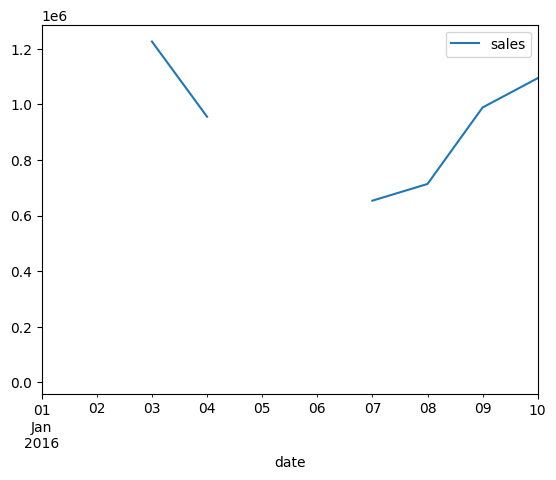

In [49]:
retail_agg.plot()

In [50]:
# fill in missing values with the mean of that column

retail_agg.fillna(retail_agg['sales'].mean()) 

,sales
date,
2016-01-01,16433.0
2016-01-02,807163.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,807163.0
2016-01-06,807163.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


<Axes: xlabel='date'>

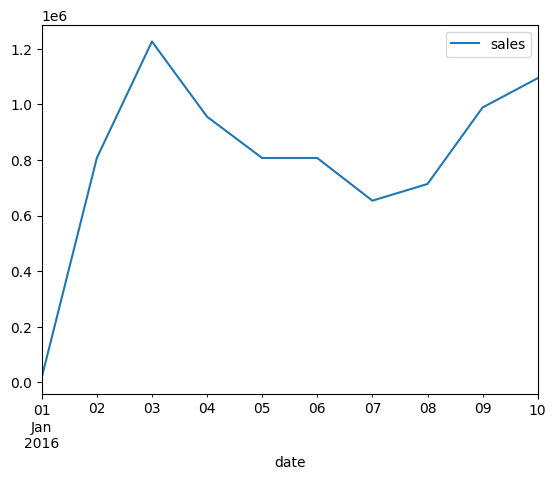

In [51]:
retail_agg.fillna(retail_agg['sales'].mean()).plot()    

In [52]:
# forward fill

retail_agg.ffill()

,sales
date,
2016-01-01,16433.0
2016-01-02,16433.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,955957.0
2016-01-06,955957.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


<Axes: xlabel='date'>

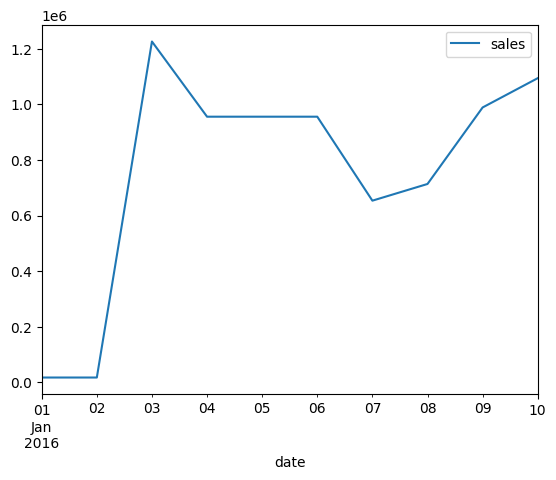

In [53]:
retail_agg.ffill().plot()

In [54]:
# backward fill (fill in with the most recent value)

retail_agg.bfill()

,sales
date,
2016-01-01,16433.0
2016-01-02,1226736.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,653504.0
2016-01-06,653504.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


<Axes: xlabel='date'>

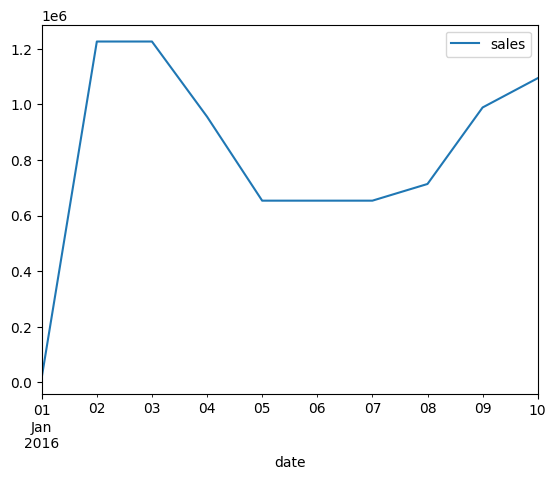

In [55]:
retail_agg.bfill().plot()

In [57]:
# Use interpolation to fill in missing values
# what would be the linear decrease between these days

retail_agg.interpolate().round()

,sales
date,
2016-01-01,16433.0
2016-01-02,621584.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,855139.0
2016-01-06,754322.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


<Axes: xlabel='date'>

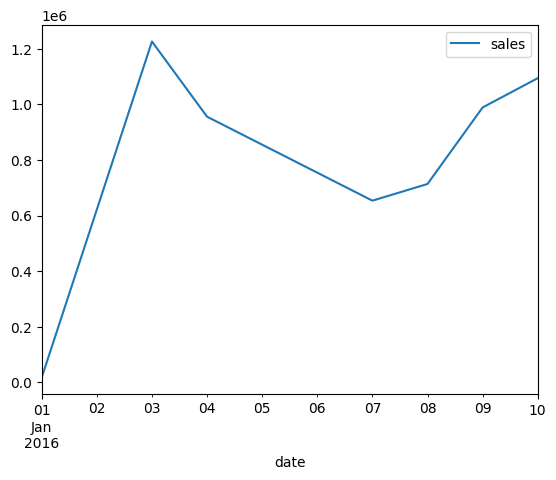

In [58]:
retail_agg.interpolate().round().plot()

## 5 - Shifting & Aggregating

### Shifting Series

You can `shift a Series` by a specified number of rows using the `.shift()` method
* This is helpful when working with time series to compare values against previous periods

<img src="../images/sec07-time_series/10-shifting_series.png">


In [60]:
# aggregated sales by date

retail_agg = retail.groupby(['date']).agg({'sales': 'sum'}).round().iloc[1:10]

retail_agg

,sales
date,
2016-01-02,1066677.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,835320.0
2016-01-06,821686.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0
2016-01-10,1094694.0


In [62]:
retail_agg.assign(
    yesterday_sales = retail_agg['sales'].shift(),
    sales_diff = retail_agg['sales'] - retail_agg['sales'].shift(),
    sales_diff_ratio = retail_agg['sales'] / retail_agg['sales'].shift()  # today of yesterday's sales 
)

,sales,yesterday_sales,sales_diff,sales_diff_ratio
date,,,,
2016-01-02,1066677.0,NaN,NaN,NaN
2016-01-03,1226736.0,1066677.0,160059.0,1.150054
2016-01-04,955957.0,1226736.0,-270779.0,0.779269
2016-01-05,835320.0,955957.0,-120637.0,0.873805
2016-01-06,821686.0,835320.0,-13634.0,0.983678
2016-01-07,653504.0,821686.0,-168182.0,0.795321
2016-01-08,713608.0,653504.0,60104.0,1.091972
2016-01-09,989209.0,713608.0,275601.0,1.386208
2016-01-10,1094694.0,989209.0,105485.0,1.106636


### **PRO TIP:** DIFF

The `diff()` method calculates the difference between the values in a Series and those same values shifted a specified number of periods
* This is useful in measuring absolute changes over time

<img src="../images/sec07-time_series/11-diff.png">

In [63]:
retail_agg = retail.groupby(['date']).agg({'sales': 'sum'}).round().iloc[1:10]

retail_agg

,sales
date,
2016-01-02,1066677.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,835320.0
2016-01-06,821686.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0
2016-01-10,1094694.0


In [64]:
# calculate the daily change in sales (difference between today's sales and yesterday's sales)

retail_agg.assign(
    daily_change = retail_agg['sales'].diff()
)

,sales,daily_change
date,,
2016-01-02,1066677.0,NaN
2016-01-03,1226736.0,160059.0
2016-01-04,955957.0,-270779.0
2016-01-05,835320.0,-120637.0
2016-01-06,821686.0,-13634.0
2016-01-07,653504.0,-168182.0
2016-01-08,713608.0,60104.0
2016-01-09,989209.0,275601.0
2016-01-10,1094694.0,105485.0


In [65]:
retail_agg.assign(
    daily_change = retail_agg['sales'].diff(),
    growth = (retail_agg['sales'].diff()) / retail_agg['sales'].shift() 
)

,sales,daily_change,growth
date,,,
2016-01-02,1066677.0,NaN,NaN
2016-01-03,1226736.0,160059.0,0.150054
2016-01-04,955957.0,-270779.0,-0.220731
2016-01-05,835320.0,-120637.0,-0.126195
2016-01-06,821686.0,-13634.0,-0.016322
2016-01-07,653504.0,-168182.0,-0.204679
2016-01-08,713608.0,60104.0,0.091972
2016-01-09,989209.0,275601.0,0.386208
2016-01-10,1094694.0,105485.0,0.106636


In [66]:
retail_agg.assign(
    daily_change = retail_agg['sales'].diff(),
    growth = retail_agg['sales'].pct_change()
)

,sales,daily_change,growth
date,,,
2016-01-02,1066677.0,NaN,NaN
2016-01-03,1226736.0,160059.0,0.150054
2016-01-04,955957.0,-270779.0,-0.220731
2016-01-05,835320.0,-120637.0,-0.126195
2016-01-06,821686.0,-13634.0,-0.016322
2016-01-07,653504.0,-168182.0,-0.204679
2016-01-08,713608.0,60104.0,0.091972
2016-01-09,989209.0,275601.0,0.386208
2016-01-10,1094694.0,105485.0,0.106636


## Aggregating & Resampling

### Aggregating Time Series

You can `aggregate time series` using the `.groupby()` method

_Example - Calculates the total sales by month, regardless of the year_

```python
sales.groupby(sales["date"].dt.month).agg({"sales": "sum"})
```

### Resampling Time Series

`Resampling` is a special form of time series aggregation that modifies date indices and fills any gaps to create continuous date values
* Frequencies are used to define the granularity (_you can use years, quarters, and months now!_)

<img src="../images/sec07-time_series/12-resampling_time_series.png">

In [67]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [72]:
retail.groupby([retail['date'].dt.year, retail['date'].dt.month]).agg({'sales': 'sum'}).round(2)


sales
date date             
2016 1     23977804.89
     2     21947408.80
     3     23131780.88
     4     25963025.10
     5     24779432.26
     6     22209218.58
     7     23462672.43
     8     22452414.32
     9     22417448.10
     10    24030389.82
     11    24642640.20
     12    29640287.58
2017 1     26328159.94
     2     23250112.37
     3     26704017.69
     4     25895308.49
     5     26911847.25
     6     25682822.12
     7     27011477.57
     8     12433322.94

In [73]:
retail.set_index('date').resample('M').sum().round(2)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2016-01-31,109023650109,1519155,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,23977804.89,119578
2016-02-29,104752572111,1421145,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,21947408.80,183541
2016-03-31,114930124749,1519155,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,23131780.88,181790
2016-04-30,114128305830,1470150,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,25963025.10,215312
2016-05-31,120935040633,1519155,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,24779432.26,370019
2016-06-30,119939514750,1470150,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,22209218.58,285416
2016-07-31,126939956517,1519155,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,23462672.43,264605
2016-08-31,129991635081,1519155,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,22452414.32,271592
2016-09-30,128703960990,1470150,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,22417448.10,296361


In [74]:
retail.set_index('date').resample('Q').sum().round(2)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2016-03-31,328706346969,4459455,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,69056994.57,484909
2016-06-30,355002861213,4459455,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,72951675.94,870747
2016-09-30,385635552588,4508460,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,68332534.85,832558
2016-12-31,407884862385,4459455,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,78313317.59,1326370
2017-03-31,429267254130,4410450,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,76282290.00,999973
2017-06-30,460188918189,4459455,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,78489977.87,1180270
2017-09-30,242629045758,2254230,AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...,39444800.51,569406


### Rolling Aggregations

`Rolling aggregations` let you perform calculations on shifting periods of time
* This can be used to calculate things like moving averages, which are helpful in reducing noise when plotting trends

<img src="../images/sec07-time_series/13-rolling_aggregations.png">

_rolling periods can really help illuminate our data by reducing noise, examples:_

In [76]:
# create a series from our retail dataframe
# 1 - setting our index as date
# 2 - just selecting the sales column (so we're working with a series)
# 3 - resampling this to get the daily sum of sales rounded to 2 decimal places

retail_daily = retail.set_index('date').loc[:, "sales"].resample('D').sum().round(2)

retail_daily

date
2016-01-01      16433.39
2016-01-02    1066677.42
2016-01-03    1226735.72
2016-01-04     955956.88
2016-01-05     835320.44
                 ...    
2017-08-11     826373.72
2017-08-12     792630.54
2017-08-13     865639.68
2017-08-14     760922.41
2017-08-15     762661.94
Freq: D, Name: sales, Length: 593, dtype: float64

In [77]:
# calculating a 2 day rolling average

retail_daily.rolling(2).mean()

date
2016-01-01            NaN
2016-01-02     541555.405
2016-01-03    1146706.570
2016-01-04    1091346.300
2016-01-05     895638.660
                 ...     
2017-08-11     738880.315
2017-08-12     809502.130
2017-08-13     829135.110
2017-08-14     813281.045
2017-08-15     761792.175
Freq: D, Name: sales, Length: 593, dtype: float64

<Axes: xlabel='date'>

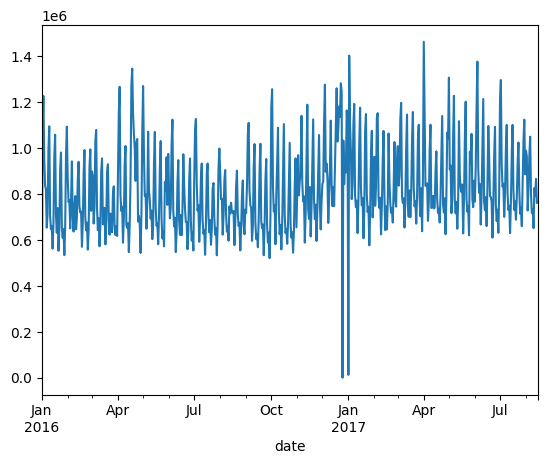

In [83]:
retail_daily.plot() # pretty noisy / volatile and hard to get too much insight from this

<Axes: xlabel='date'>

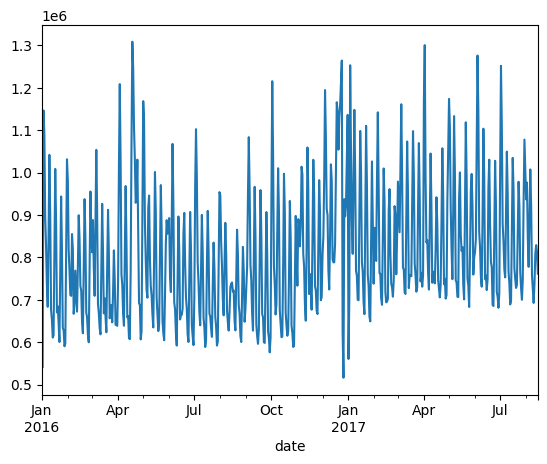

In [84]:
retail_daily.rolling(2).mean().plot() # smooth out a little better

<Axes: xlabel='date'>

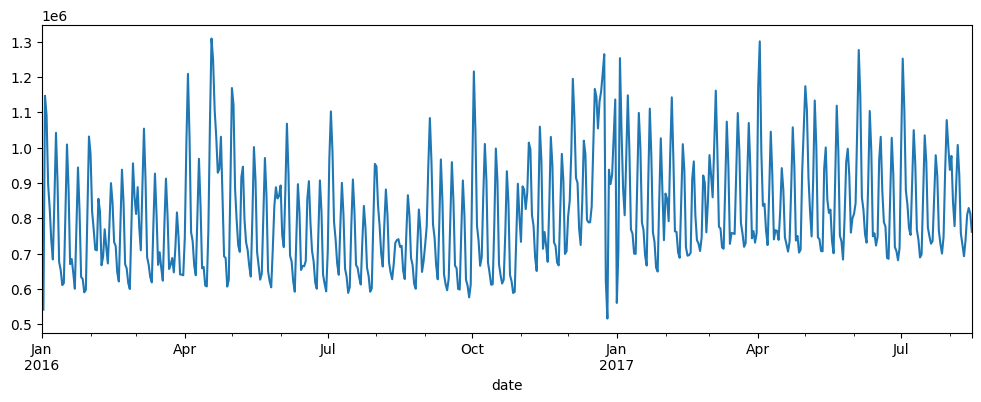

In [82]:
retail_daily.rolling(2).mean().plot(figsize=(12, 4))

In [85]:
# go ahead and do a monthly average / a rolling period of 30 days

retail_daily.rolling(30).mean()

date
2016-01-01              NaN
2016-01-02              NaN
2016-01-03              NaN
2016-01-04              NaN
2016-01-05              NaN
                  ...      
2017-08-11    842283.135333
2017-08-12    847715.774667
2017-08-13    851054.110000
2017-08-14    844115.619333
2017-08-15    832844.227333
Freq: D, Name: sales, Length: 593, dtype: float64

<Axes: xlabel='date'>

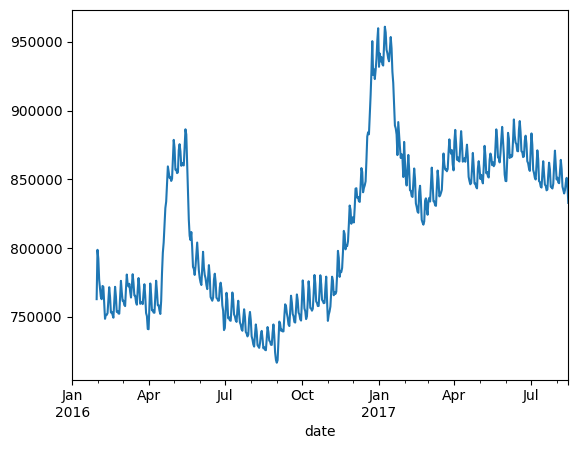

In [86]:
retail_daily.rolling(30).mean().plot()

<Axes: xlabel='date'>

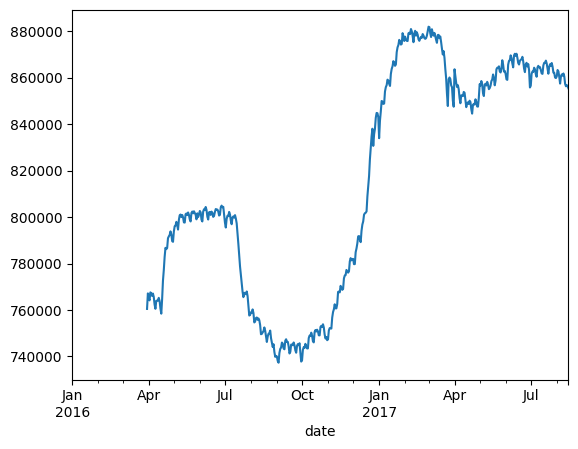

In [87]:
# quarterly moving average

retail_daily.rolling(90).mean().plot()

<Axes: xlabel='date'>

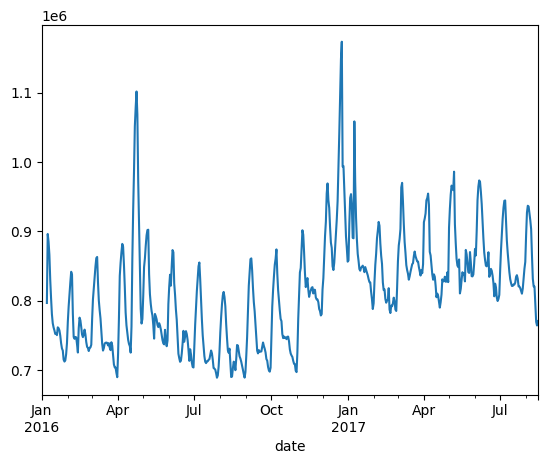

In [88]:
# weekly view

retail_daily.rolling(7).mean().plot()

## KEY TAKEAWAYS

<img src="../images/sec07-time_series/14-key_takeaways.png">